<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/VSC_PhiResistanceAndLeastAction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:40: SyntaxWarning: invalid escape sequence '\p'
<>:66: SyntaxWarning: invalid escape sequence '\p'
<>:40: SyntaxWarning: invalid escape sequence '\p'
<>:66: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-4289897904.py:40: SyntaxWarning: invalid escape sequence '\p'
  plt.axvline(phi, color='gold', linestyle='--', label=f'Golden Ratio ($\phi$ \u2248 {phi:.3f})')
/tmp/ipython-input-4289897904.py:66: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(theta, r_phi, color='gold', linewidth=2, label='$\phi$-Scaled Path (Laminar)')


Simulation complete. Plots and CSV generated.


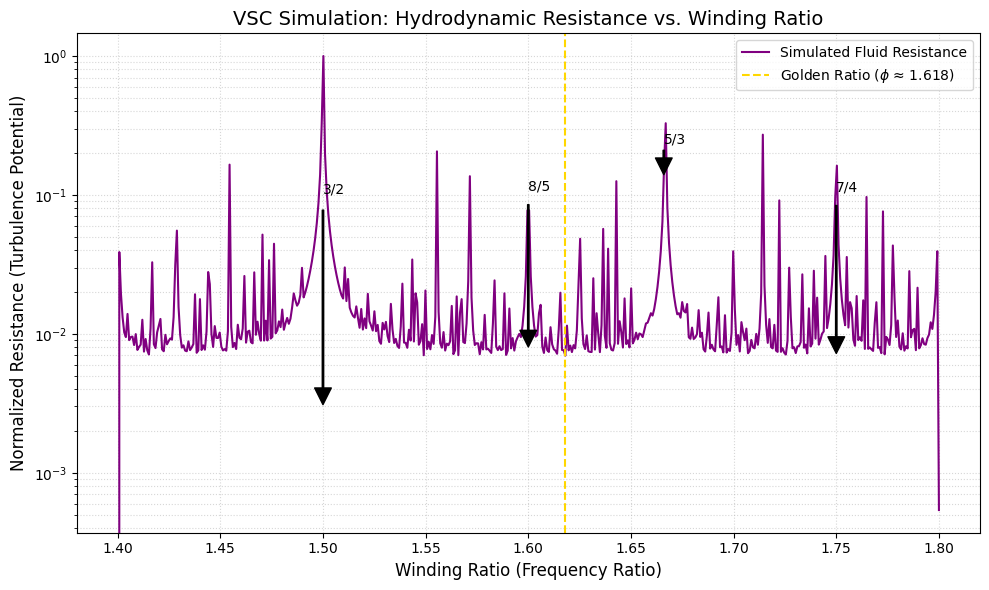

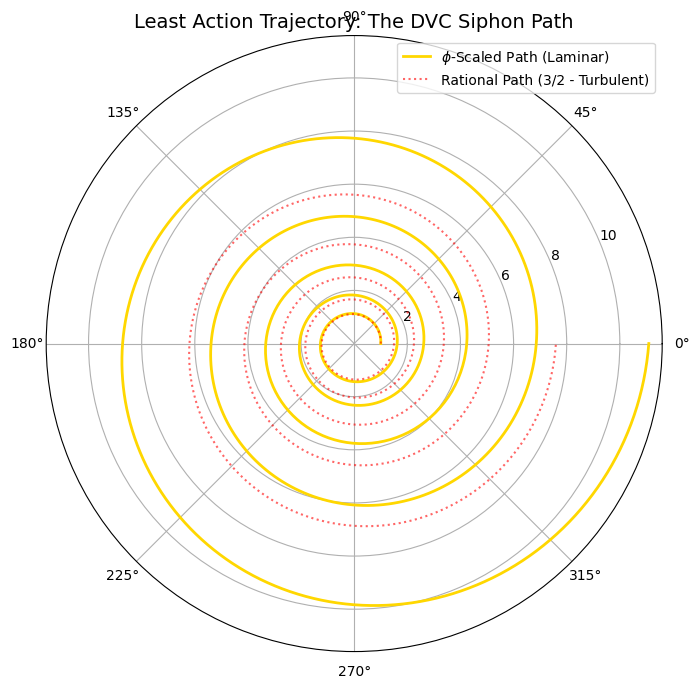

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the Golden Ratio
phi = (1 + 5**0.5) / 2

# We want to test various winding ratios (k) and see their "Instability Index"
# Based on the KAM theorem mentioned in the paper, stability depends on irrationality.
# A common measure of 'Resistance' to stability is the proximity to rational numbers (Small Divisors).

def instability_index(k, max_denominator=50):
    """
    Calculates an instability index based on proximity to low-order rational resonances.
    Lower value = more stable (less resistance).
    """
    index = 0
    for q in range(1, max_denominator + 1):
        p = round(k * q)
        distance = abs(k - p/q)
        if distance > 0:
            # Strength of resonance is inversely proportional to denominator and distance
            index += 1.0 / (q**2 * distance)
    return index

# Test range of ratios from 1.4 to 1.8 (phi is ~1.618)
ratios = np.linspace(1.4, 1.8, 500)
instability = np.array([instability_index(r) for r in ratios])

# Normalize for plotting (as "Resistance")
resistance = (instability - np.min(instability)) / (np.max(instability) - np.min(instability))

# Save data to CSV
df = pd.DataFrame({'Winding_Ratio': ratios, 'Resistance_Metric': resistance})
df.to_csv('phi_stability_simulation.csv', index=False)

# Visualization 1: Resistance vs Ratio
plt.figure(figsize=(10, 6))
plt.plot(ratios, resistance, color='purple', label='Simulated Fluid Resistance')
plt.axvline(phi, color='gold', linestyle='--', label=f'Golden Ratio ($\phi$ \u2248 {phi:.3f})')

# Mark common rational resonances
resonances = [1.5, 1.6, 1.666, 1.75]
res_labels = ['3/2', '8/5', '5/3', '7/4']
for r, l in zip(resonances, res_labels):
    plt.annotate(l, xy=(r, instability_index(r)/np.max(instability)),
                 xytext=(r, instability_index(r)/np.max(instability) + 0.1),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1))

plt.title('VSC Simulation: Hydrodynamic Resistance vs. Winding Ratio', fontsize=14)
plt.xlabel('Winding Ratio (Frequency Ratio)', fontsize=12)
plt.ylabel('Normalized Resistance (Turbulence Potential)', fontsize=12)
plt.yscale('log') # Log scale helps see the "valleys" of stability
plt.grid(True, which='both', linestyle=':', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig('phi_resistance_plot.png')

# Visualization 2: The "Phi-Spiral" Path of Least Resistance
theta = np.linspace(0, 10 * np.pi, 1000)
r_phi = np.exp(np.log(phi) / (2 * np.pi) * theta)
r_rational = np.exp(np.log(1.5) / (2 * np.pi) * theta) # 3/2 resonance

plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1, projection='polar')
plt.plot(theta, r_phi, color='gold', linewidth=2, label='$\phi$-Scaled Path (Laminar)')
plt.plot(theta, r_rational, color='red', linestyle=':', alpha=0.6, label='Rational Path (3/2 - Turbulent)')
plt.title('Least Action Trajectory: The DVC Siphon Path', fontsize=14)
plt.legend(loc='upper right')
plt.savefig('phi_spiral_comparison.png')

print("Simulation complete. Plots and CSV generated.")